In [ ]:
from astropy.coordinates import SkyCoord
from astropy import units as u

# Replace with your actual RA and Dec values
# ra = 198 * u.deg
# dec = 40 * u.deg

ra = 19 * u.hour
dec = 40 * u.deg

coord = SkyCoord(ra=ra, dec=dec, frame='icrs')

# Use VizieR to query the SIMBAD astronomical database
from astroquery.vizier import Vizier
result = Vizier.query_region(coord, radius=1*u.arcmin, catalog="SIMBAD")
print(result)

TableList with 3 tables:
	'0:I/297/out' with 19 column(s) and 50 row(s) 
	'1:I/322A/out' with 24 column(s) and 50 row(s) 
	'2:I/340/ucac5' with 20 column(s) and 50 row(s) 
   NOMAD1      RAJ2000     DEJ2000    YM  r  ... r_Rmag  Jmag   Hmag   Kmag   R 
                 deg         deg             ...         mag    mag    mag      
------------ ----------- ----------- --- --- ... ------ ------ ------ ------ ---
1249-0391563 299.8850611  34.9550222  .M   B ...      B 13.856 12.576 12.164    
1249-0391569 299.8860194  34.9513167  YM   B ...      B 14.917 14.188 14.087    
1249-0391583 299.8880658  34.9575769  .M   M ...        17.021 16.053 15.371    
1249-0391585 299.8883611  34.9518694  YM   Y ...        16.638 15.987 16.234    
1249-0391609 299.8916861  34.9567056  .M   B ...      B 13.849 12.743 12.305    


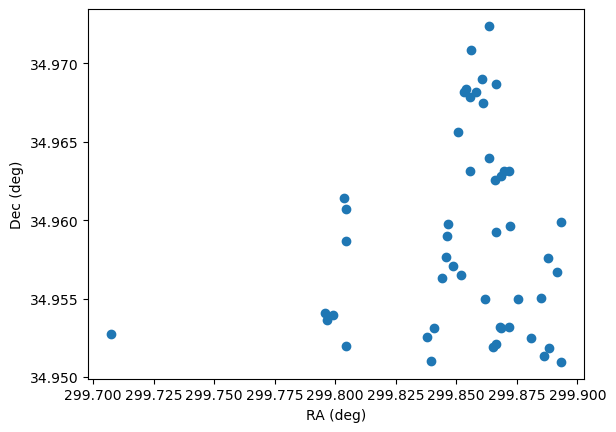

In [2]:
from astroquery.vizier import Vizier
import astropy.units as u
import astropy.coordinates as coord
result = Vizier.query_region(coord.SkyCoord(ra=299.590, dec=35.201,
                                            unit=(u.deg, u.deg),
                                            frame='icrs'),
                        width="30m",
                        catalog=["NOMAD", "UCAC"])
print(result)

# Access the first table (NOMAD)
nomad_table = result[0]

# Print the first 5 rows of the NOMAD table
print(nomad_table[:5])

# Access a specific column from the NOMAD table
ra_values = nomad_table['RAJ2000']
dec_values = nomad_table['DEJ2000']

# Plot the objects on a sky map
import matplotlib.pyplot as plt
plt.scatter(ra_values, dec_values)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.show()

In [3]:
from astropy.coordinates import SkyCoord
from astroquery.simbad import Simbad

# Define coordinates
ra = 10.625 * 15  # Convert degrees to hours
dec = -41.2    # degrees

# Create a SkyCoord object
coord = SkyCoord(ra=ra, dec=dec, unit='deg', frame='icrs')

# Query SIMBAD
result_table = Simbad.query_region(coord, radius='5 arcsec')

# Print object names
if result_table is not None:
    object_names = result_table['MAIN_ID']
    print("Objects found at the specified coordinates:")
    for name in object_names:
        print(name)
else:
    print("No object found at the specified coordinates.")

No object found at the specified coordinates.


In [40]:
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord
import astropy.units as u
# Simbad.query_region(SkyCoord(31.0087, 14.0627, unit=(u.deg, u.deg),
#                     frame='galactic'), radius=200 * u.arcsec)

galactic_coords = SkyCoord(l=31.0087, b=14.0627, unit=(u.deg, u.deg), frame='galactic')

result = Simbad.query_region(galactic_coords, radius = 20 * u.arcsec)
print(result["MAIN_ID", "OTYPE"])

icrs_coords = galactic_coords.icrs
result = Simbad.query_region(icrs_coords, radius = 20 * u.arcsec)
print(result["MAIN_ID", "OTYPE"])


      MAIN_ID            OTYPE      
------------------- ----------------
           GJ 699 b Planet_Candidate
NAME Barnard's star          BYDraV*
      MAIN_ID            OTYPE      
------------------- ----------------
           GJ 699 b Planet_Candidate
NAME Barnard's star          BYDraV*


In [ ]:
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord
import astropy.units as u

galactic_coords = SkyCoord(l=133.6, b=-37.7, unit=(u.deg, u.deg), frame='galactic')

m51_coords = SkyCoord(ra="13h 29m 52.7s", dec="+47d 11m 42s", frame="icrs")

m1_coords = SkyCoord(ra="5h 34m 32s", dec="+22d 0m 52s", frame="icrs")

result = Simbad.query_region(m1_coords, radius = 10 * u.arcmin)
# print(result)

# icrs_coords = galactic_coords.icrs
# result = Simbad.query_region(icrs_coords, radius = 20 * u.arcmin)
# print(result)

# print(result.colnames)

result.sort("OTYPE")

# result["MAIN_ID", "RA", "DEC", "OTYPE"]

for r in result:
    if("M" in r["MAIN_ID"]):
        print(r["MAIN_ID", "RA", "DEC", "OTYPE"])

 MAIN_ID        RA           DEC      OTYPE 
             "h:m:s"       "d:m:s"          
--------- ------------- ------------- ------
V* CM Tau 05 34 31.9474 +22 00 52.153 Pulsar
MAIN_ID     RA        DEC      OTYPE  
         "h:m:s"    "d:m:s"           
------- ---------- --------- ---------
  M   1 05 34 31.8 +22 01 03 SNRemnant
        MAIN_ID               RA           DEC      OTYPE
                           "h:m:s"       "d:m:s"         
----------------------- ------------- ------------- -----
2MASS J05341074+2202422 05 34 10.7527 +22 02 42.209  Star
        MAIN_ID               RA           DEC      OTYPE
                           "h:m:s"       "d:m:s"         
----------------------- ------------- ------------- -----
2MASS J05340120+2200537 05 34 01.2114 +22 00 53.726  Star
        MAIN_ID               RA           DEC      OTYPE
                           "h:m:s"       "d:m:s"         
----------------------- ------------- ------------- -----
2MASS J05340719+2200294 05

In [25]:
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord
import astropy.units as u

Simbad.reset_votable_fields()
Simbad.add_votable_fields('otype')

# RA = 10.68470833
# DEC = 41.26916667

RA = 170.75
DEC = 23.9


coords = SkyCoord(RA, DEC , unit=(u.deg, u.deg), frame='icrs')

result = Simbad.query_region(coords, radius=2 * u.arcmin)


result.sort("OTYPE")
# types = result["MAIN_ID", "OTYPE"]

result

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,OTYPE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,object,int32
NAME Coma Supercluster,11 23,+23.9,2,2,--,--,0,E,,,SuperClG,1


In [6]:
from astroquery.simbad import Simbad
Simbad.query_region

<function astroquery.utils.process_asyncs.async_to_sync.<locals>.create_method.<locals>.newmethod(self, *args, **kwargs)>

In [26]:
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord
import astropy.units as u

RA = 56.7
DEC = -1.1

c = SkyCoord("5h35m17.3s -5d23m28s", frame="galactic")  # Units from string


# result = Simbad.query_region(SkyCoord(RA, DEC, unit=(u.deg, u.deg),
#                     frame='galactic'), radius=2 * u.arcmin)

result = Simbad.query_region(c, radius=100 * u.arcmin)

result.sort("OTYPE")
result["MAIN_ID", "OTYPE"]

MAIN_ID,OTYPE
object,object
GSC 03169-00901,**
HD 202879,**
TYC 3173-864-1,**
BD+37 4210,**
BD+40 4451,**
BD+39 4435,**
TYC 3169-897-1,**
UCAC4 658-093062,**
GSC 03173-02198,**


In [10]:
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord
import astropy.units as u

Simbad.reset_votable_fields()
Simbad.add_votable_fields('OTYPE')

# Define the center of the region in celestial coordinates (RA, Dec)
region_center = SkyCoord(ra=5.9195, dec=7.4069, unit=(u.deg, u.deg), frame='icrs')

# Define the radius of the region to query (in degrees)
radius = 0.1 * u.deg  # 0.1 degree radius

# Query the region


result = Simbad.query_region(region_center, radius=radius)


print(result.colnames)

# Print the result
print(result["MAIN_ID", "RA", "DEC", "OTYPE"])

KeyError: 'OTYPE: no such field'